### Q&A Activity on Testing of Hypothesis
1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading sample dataset to pandas DataFrame
data = pd.read_csv("Week_8_Q&A_dataset - Sheet1.csv")
data

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


### 1. Carry out descriptive analytics on the dataset.

In [3]:
#Understanding labels & features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [4]:
#Statistical info about sample dataset
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


**Comments:  
Mean of sample dataset  = 32.32  
Median of sample dataset = 33.00  
Standard deviation = 12.45**

### 2. Check whether female and male students scored the same marks.

In [5]:
Data_male = data[data["Gender"]=="male"]["Total Marks"]
Data_male.describe()

count    12.000000
mean     30.416667
std      12.168950
min      14.000000
25%      21.750000
50%      29.000000
75%      43.250000
max      47.000000
Name: Total Marks, dtype: float64

In [6]:
Data_female = data[data["Gender"]=="female"]["Total Marks"]
Data_female.describe()

count    16.000000
mean     33.750000
std      12.865976
min      12.000000
25%      25.500000
50%      39.000000
75%      43.500000
max      50.000000
Name: Total Marks, dtype: float64

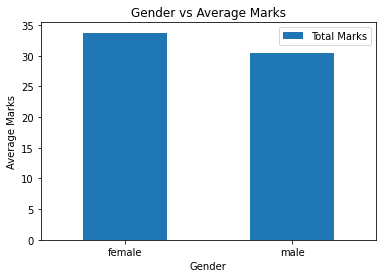

In [7]:
#plot bar graph
data_1 = data.groupby(['Gender']).mean()
data_2 = data_1.iloc[:2]
data_2.plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Average Marks")
plt.title("Gender vs Average Marks")
plt.xticks(rotation=0)
plt.show()

Comments:  
Based on Gender, there is no significant difference in Average Marks.

In [8]:
#Defining a null hypothesis and an alternative hypothesis.

µ0 = Average Marks obtained by Male Students  
µ1 = Average Marks obtained by Female Students

The null hypothesis assumes that there is no difference in the sample mean and the comparison mean.  
Null Hypothesis: µ0 = µ1  
Average Marks obtained by Male Students and Female Students are same.  

Alternative Hypothesis: µ0 != µ1  
Average marks obtained by Male Students and Female students are different.  

The purpose of the T Test is to test if the null hypothesis can be rejected or not.  

The alternative hypothesis just states the difference in means is not equal.  
Here, there is no comparison if one of the means is greater or lesser than the other.  
When the sample mean is not equal to the comparison mean, use Two Tailed T Test.

In [9]:
#Confidence Interval = 95% or 0.95

In [10]:
#Rejection region: Level of Significance or alpha value = 5% or 0.05

In [11]:
#2 Tailed 2 Sample T Test

import scipy.stats as stats

tscore, pval = stats.ttest_ind(Data_male, Data_female, equal_var=True, alternative='two-sided')

print("t Statistic: ", tscore)

print("P Value: ", pval)

t Statistic:  -0.6940885268848668
P Value:  0.4937822317960763


Note:  
Negative t-value shows a reversal in the directionality of the effect being studied. 
Negative values are the result of a substraction in the wrong order (smallest sample minus biggest sample).  
We depend on p value to draw the conclusion.  
If p value < 0.05 we reject Null Hypothesis and conclude there is significant difference between factors.  
Otherwise no significant difference between factors.

In [12]:
# for alpha value = 5% or 0.05
if pval < 0.05:    
   print("Average Marks obtained by Male Students and Female Students are different")
else:
  print("Average Marks obtained by Male Students and Female Students are same")

Average Marks obtained by Male Students and Female Students are same


**Inference:  
Null hypothesis cannot be rejected since P-value of the test is greater than alpha value.  
P Value lies within the Confidence interval.  
So, it can be concluded that Average marks obtained by male and female students are the same.**

### 3. Whether test preparation helps the students?

In [13]:
test_completed = data[data["Test preparation"]=="completed"]["Total Marks"]
test_completed.describe()

count     7.000000
mean     44.571429
std       3.359422
min      40.000000
25%      43.000000
50%      44.000000
75%      46.000000
max      50.000000
Name: Total Marks, dtype: float64

In [14]:
test_none = data[data["Test preparation"]=="none"]["Total Marks"]
test_none.describe()

count    21.000000
mean     28.238095
std      11.661495
min      12.000000
25%      18.000000
50%      27.000000
75%      38.000000
max      48.000000
Name: Total Marks, dtype: float64

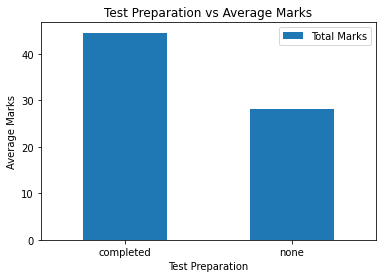

In [15]:
#plot bar graph
data_1 = data.groupby(['Test preparation']).mean()
data_2 = data_1.iloc[:2]
data_2.plot(kind='bar')
plt.xlabel("Test Preparation")
plt.ylabel("Average Marks")
plt.title("Test Preparation vs Average Marks")
plt.xticks(rotation=0)
plt.show()

Comments:  
Based on Test preparation, there is considerable difference in Average Marks.

In [16]:
#Defining a null hypothesis and an alternative hypothesis.

µ0 = Average Marks obtained by Students who prepared for the test  
µ1 = Average Marks obtained by Students who didnot prepare for the test  

Null Hypothesis: µ0 = µ1  
Average marks of students who prepared for test is same as for those who didnot prepare for test.  

Alternative Hypothesis: µ0 > µ1  
Average marks of students who prepared for test is higher than for those who didnot prepare for test.

The alternative hypothesis states the mean of the sample of interest is greater than the comparison mean.
In such case, use Upper Tailed based test.

In [17]:
#Confidence Interval = 95% or 0.95

In [18]:
#Rejection region: Level of Significance or alpha value = 5% or 0.05

In [25]:
#1 tailed 2 sample t-test

tscore, pval = stats.ttest_ind(test_completed, test_none, equal_var=True, alternative='greater')

print("t Statistic: ", tscore)

print("P Value: ", pval)

t Statistic:  3.6143637527769217
P Value:  0.0006335646228660053


In [20]:
# for alpha value is 0.05 or 5%
if pval < 0.05:    
   print("Test preparation helped the students")
else:
  print("Test preparation did not help the students")

Test preparation helped the students


**Inference:  
Null hypothesis can be rejected since P-value of the test is less than alpha value.  
Reject the null hypothesis of equality of the two means for the alternative hypothesis.  
P Value lies outside the Confidence interval and within the rejection region.  
Average marks obtained by students who completed test preparation is higher than that of the students who didnot prepare for the test.  
So, it can be concluded that test preparation helped the students in scoring better marks.**